In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

df = pd.read_csv('data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index(pd.DatetimeIndex(df['timestamp']))
df = df[df['timestamp'] >= pd.Timestamp('2020/08/25')]
df = df[df['timestamp'] <= pd.Timestamp('2020/10/02')]
df = df[df['obj_score'] <= 39]
df = df[df['obj_score'] >= 33.5]


print(df['timestamp'])
print(df.index)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


timestamp
2020-08-25 01:15:54   2020-08-25 01:15:54
2020-08-25 01:40:01   2020-08-25 01:40:01
2020-08-25 01:42:08   2020-08-25 01:42:08
2020-08-25 01:48:50   2020-08-25 01:48:50
2020-08-25 01:50:19   2020-08-25 01:50:19
                              ...        
2020-09-17 00:03:24   2020-09-17 00:03:24
2020-09-17 00:03:28   2020-09-17 00:03:28
2020-09-17 00:03:37   2020-09-17 00:03:37
2020-09-17 00:03:41   2020-09-17 00:03:41
2020-09-17 00:04:00   2020-09-17 00:04:00
Name: timestamp, Length: 19394, dtype: datetime64[ns]
DatetimeIndex(['2020-08-25 01:15:54', '2020-08-25 01:40:01',
               '2020-08-25 01:42:08', '2020-08-25 01:48:50',
               '2020-08-25 01:50:19', '2020-08-25 01:53:52',
               '2020-08-25 01:54:44', '2020-08-25 01:54:57',
               '2020-08-25 02:03:25', '2020-08-25 02:14:42',
               ...
               '2020-09-17 00:02:48', '2020-09-17 00:02:51',
               '2020-09-17 00:02:59', '2020-09-17 00:03:11',
               '2020-09-17 0

19394
avg 35.36828709910279 std 0.810098018411632
Personal mean 0.5663336860918797, personal std 0.28742664488969083
Location A
len 3622 avg 35.56559083379352 std 0.8964771159636327
Personal mean 0.7721793869726008, personal std 0.24669895000307795
Location B
Personal mean 0.6784102001668876, personal std nan
len 4759 avg 35.29402185333053 std 0.6784102001668819
Location C
Personal mean 0.3887611403860713, personal std 0.24074302566462596
len 2508 avg 35.09165869218498 std 0.6854905451799601
119


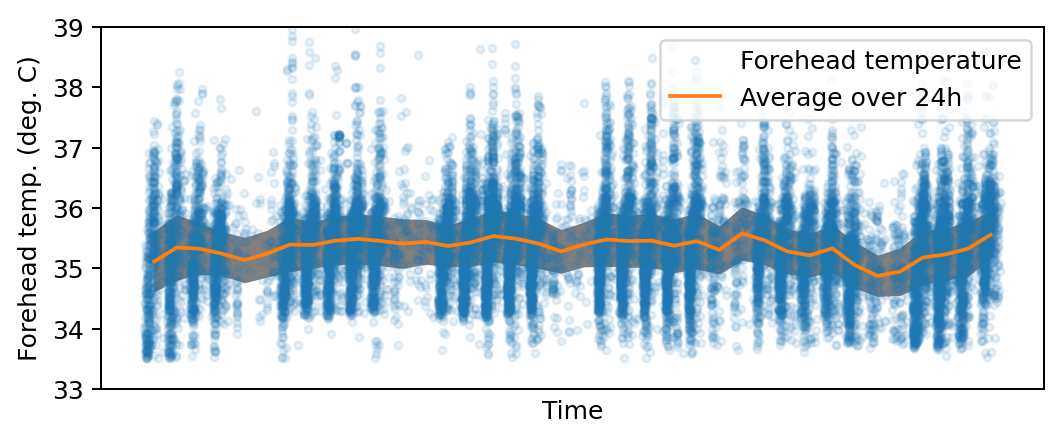

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
plt.plot(df['timestamp'], df['obj_score'],'.', alpha=0.1, label='Forehead temperature')
df_mean = df.resample('D').apply({'obj_score':'mean'})
df_std = df.resample('D').apply({'obj_score':'std'})

plt.plot(df_mean.index+pd.Timedelta('0.5 day'), df_mean['obj_score'], label='Average over 24h')

plt.fill_between(df_mean.index+pd.Timedelta('0.5 day'), df_mean['obj_score'] - df_std['obj_score']/2, df_mean['obj_score'] + df_std['obj_score']/2,
                 color='gray', alpha=1.0)

# Set title and labels for axes
ax.set(       ylabel="Forehead temp. (deg. C)", xlabel="Time")

# Rotate tick marks on x-axis
#plt.setp(ax.get_xticklabels(), rotation=0)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticks([])
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
print(len(df))
print("avg {} std {}".format(df['obj_score'].mean(), df['obj_score'].std()))
fig.subplots_adjust(bottom=0.2)
mean_raw = df['obj_score'].mean()
plt.tight_layout()
ax.set_ylim(33,39)

plt.savefig('all_data.png')

groups = df.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))


print("Location A")
df_filtered = df[df['machine_id'].isin([36])]
print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))

print("Location B")
df_filtered = df[df['machine_id'].isin([24,25,30,31,32,33,34,35])]

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))

print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))
print("Location C")
df_filtered = df[df['machine_id'].isin([52])]

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))
print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))


more_than_37 = df['obj_score']
print(len(more_than_37[more_than_37 > more_than_37.mean() + 3*more_than_37.std()]))



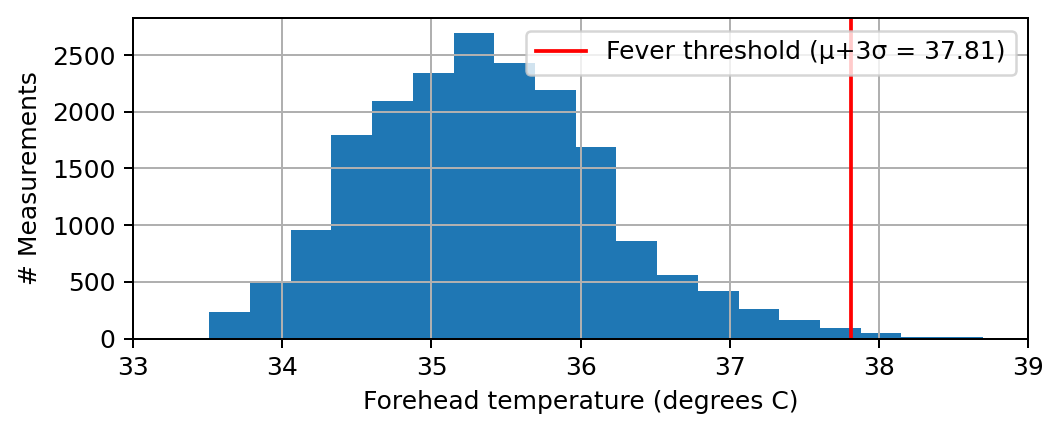

In [ ]:
plt.rcParams["figure.dpi"] = 180
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df.hist(column=['obj_score'], bins=20, figsize=(6, 3), ax = plt.gca())
ax.set(      ylabel="# Measurements", xlabel="Forehead temperature (degrees C)")
ax.set_title("")
ax.set_xlim(33,39)
# x coordinates for the lines
xcoords = [37.81]
# colors for the lines
colors = ['r']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='Fever threshold (μ+3σ = {})'.format(xc), c=c)
fig.subplots_adjust(bottom=0.2) 
plt.legend()
plt.tight_layout()

plt.savefig('hist_all.png')


R2 =  0.19947343602028422
9839
48


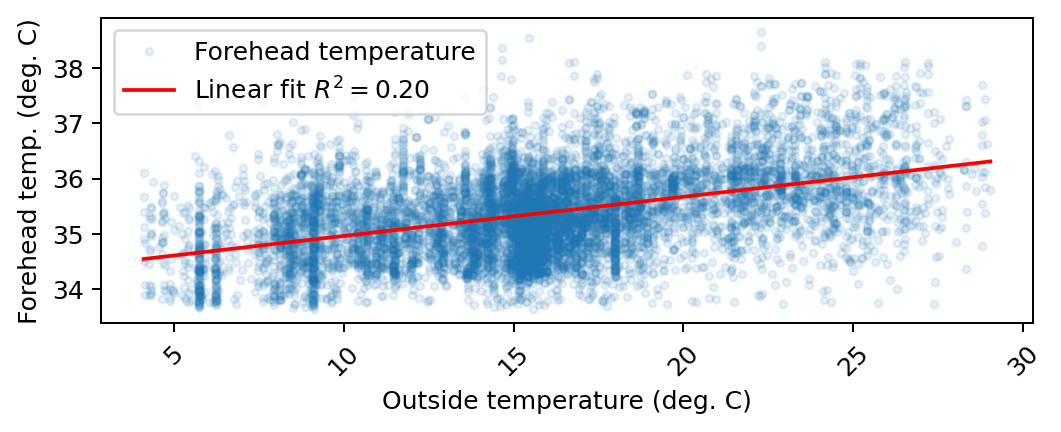

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_outside = df[df['meteo_realtemp'] > 0]
df_outside = df_outside[df_outside['machine_id'].isin([25,32,33,47,36,45,58,22,48,52])] #encore peut être 45,58,22,48,45,58,22,48,36

linear_regressor = LinearRegression()
linear_regressor.fit(df_outside['meteo_realtemp'].values.reshape(-1, 1), df_outside['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_outside['meteo_realtemp'].min(), df_outside['meteo_realtemp'].max()).reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_outside['meteo_realtemp'].values.reshape(-1, 1), df_outside['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)


ax.set(xlabel="Outside temperature (deg. C)",
       ylabel="Forehead temp. (deg. C)")

plt.plot(df_outside['meteo_realtemp'], df_outside['obj_score'],'.', alpha=0.1, label='Forehead temperature')
plt.plot(X, Y_pred, 'red', label=r'Linear fit $R^2={:.2f}$'.format(score_r2))

#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
print(len(df_outside))
#plt.title("Effect of outside temperature on forehead temperature")
more_than_37 = df_outside['obj_score']

print(len(more_than_37[more_than_37 > more_than_37.mean() + 3*more_than_37.std()]))
plt.tight_layout()

plt.savefig('outside_forehead.png')

R2 =  0.19947343602028422
9839
345


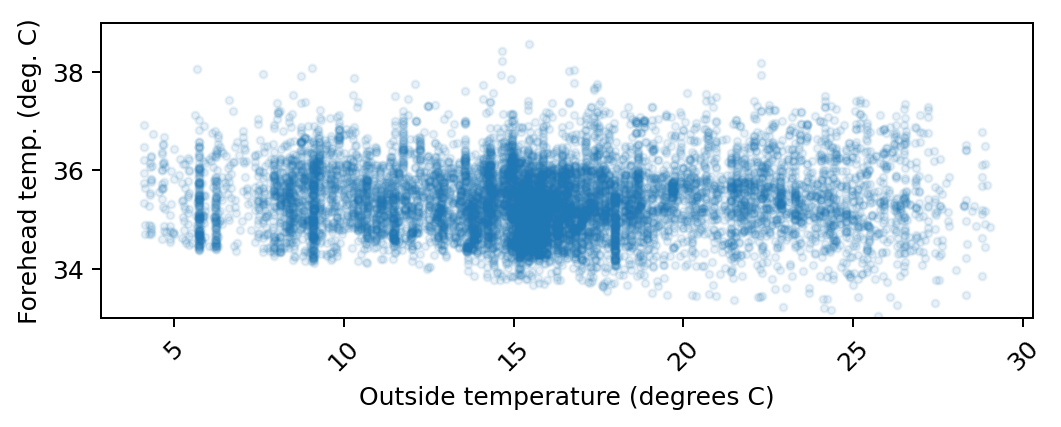

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_outside = df[df['meteo_realtemp'] > 0]
df_outside = df_outside[df_outside['machine_id'].isin([25,32,33,47,36,45,58,22,48,52])] #encore peut être 45,58,22,48,45,58,22,48,36

linear_regressor = LinearRegression()
linear_regressor.fit(df_outside['meteo_realtemp'].values.reshape(-1, 1), df_outside['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_outside['meteo_realtemp'].min(), df_outside['meteo_realtemp'].max()).reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_outside['meteo_realtemp'].values.reshape(-1, 1), df_outside['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)


ax.set(xlabel="Outside temperature (degrees C)",
       ylabel="Forehead temp. (deg. C)")
curve = linear_regressor.predict(df_outside['meteo_realtemp'].values.reshape(-1, 1))[:,0]
plt.plot(df_outside['meteo_realtemp'], df_outside['obj_score']-curve+mean_raw,'.', alpha=0.1, label='Forehead temperature')
ax.set_ylim(33,39)

#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
print(len(df_outside))
#plt.title("Measurements corrected from outside temperature model")
new_df = df_outside.copy()
new_df['obj_score'] = new_df['obj_score']-curve+mean_raw
more_than_37 = df_outside['obj_score']-curve+mean_raw
print(len(more_than_37[more_than_37 > more_than_37.mean() + 2*more_than_37.std()]))
plt.tight_layout()

plt.savefig('outside_forehead_corr.png')

R2 =  0.11008260660449797
19394


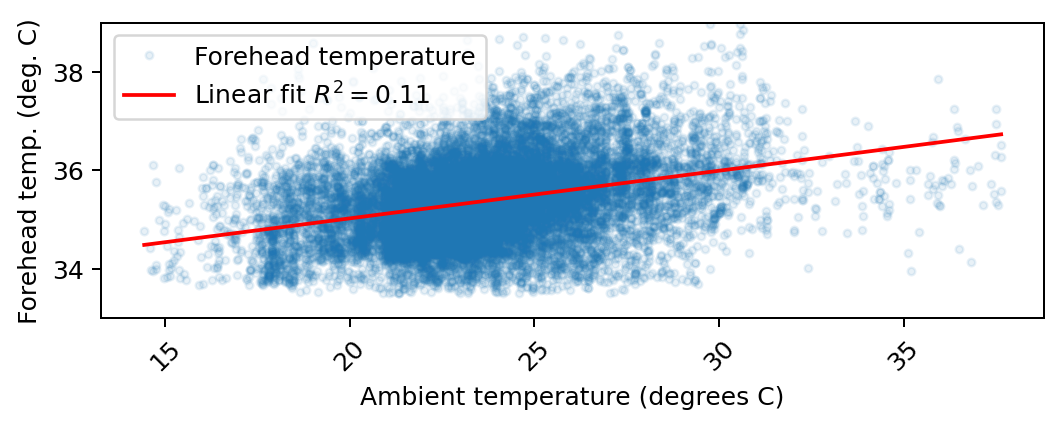

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_ambient = df[df['amb_temp'] > 0]
#df_ambient = df_ambient[df_ambient['machine_id'].isin([25,32,33,36,47])] # [25,32,33,36,47]encore peut être 45,58,22,48

linear_regressor = LinearRegression()
linear_regressor.fit(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_ambient['amb_temp'].min(), df_ambient['amb_temp'].max()).reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)

ax.set(xlabel="Ambient temperature (degrees C)",
       ylabel="Forehead temp. (deg. C)")
ax.set_ylim(33,39)

plt.plot(df_ambient['amb_temp'], df_ambient['obj_score'],'.', alpha=0.1, label='Forehead temperature')
plt.plot(X, Y_pred, 'red', label=r'Linear fit $R^2={:.2f}$'.format(score_r2))


#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
#plt.title("Effect of ambient temperature on forehead temperature")
print(len(df_ambient))
plt.tight_layout()
plt.savefig('ambient_forehead.png')

R2 =  0.11008260660449797
634


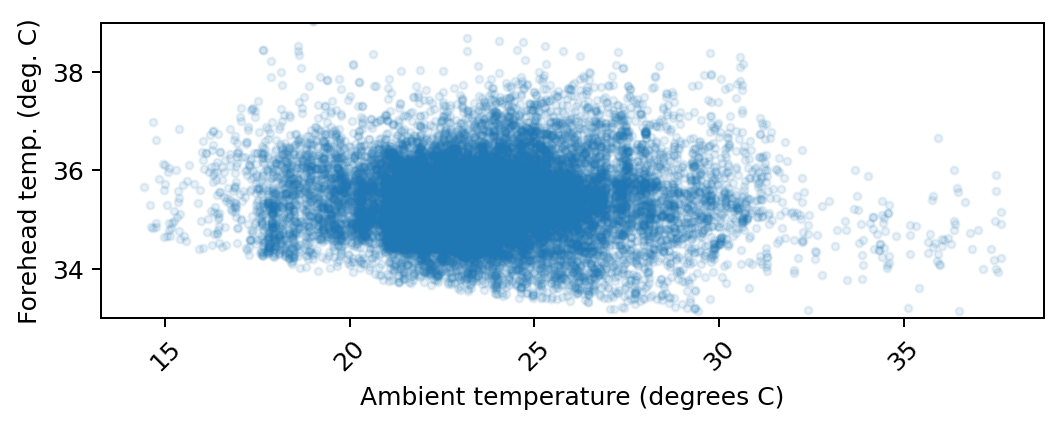

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_ambient = df[df['amb_temp'] > 0]
#df_ambient = df_ambient[df_ambient['machine_id'].isin([25,32,33,36,47])] # [25,32,33,36,47]encore peut être 45,58,22,48

linear_regressor = LinearRegression()
linear_regressor.fit(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_ambient['amb_temp'].min(), df_ambient['amb_temp'].max()).reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)

ax.set(xlabel="Ambient temperature (degrees C)",
       ylabel="Forehead temp. (deg. C)")
curve = linear_regressor.predict(df_ambient['amb_temp'].values.reshape(-1, 1))[:,0]
ax.set_ylim(33,39)

plt.plot(df_ambient['amb_temp'], df_ambient['obj_score']-curve+mean_raw,'.', alpha=0.1, label='Forehead temperature')


#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
#plt.title("Measurements corrected from ambient temperature model")
more_than_37 = df_ambient['obj_score']-curve+mean_raw
print(len(more_than_37[more_than_37 > more_than_37.mean() + 2*more_than_37.std()]))
plt.tight_layout()
plt.savefig('ambient_forehead_corr.png')

R2 =  0.011252701115101127
9839
9839
330


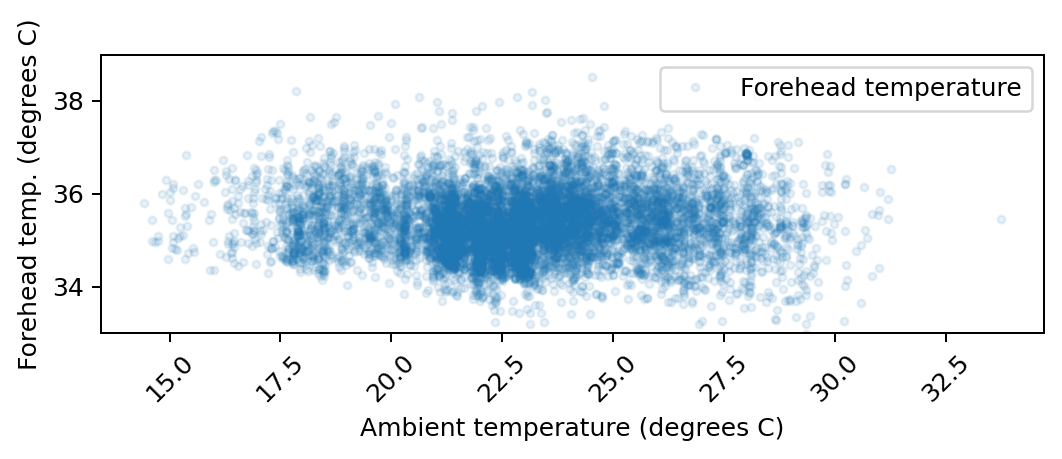

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_ambient = new_df[new_df['amb_temp'] > 0]
#df_ambient = df_ambient[df_ambient['machine_id'].isin([25,32,33,36,47])] # [25,32,33,36,47]encore peut être 45,58,22,48

linear_regressor = LinearRegression()
linear_regressor.fit(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_ambient['amb_temp'].min(), df_ambient['amb_temp'].max()).reshape(-1, 1)
Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_ambient['amb_temp'].values.reshape(-1, 1), df_ambient['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)

ax.set(xlabel="Ambient temperature (degrees C)",
       ylabel="Forehead temp. (degrees C)")
curve = linear_regressor.predict(df_ambient['amb_temp'].values.reshape(-1, 1))[:,0]
ax.set_ylim(33,39)

plt.plot(df_ambient['amb_temp'], df_ambient['obj_score']-curve+mean_raw,'.', alpha=0.1, label='Forehead temperature')

#plt.plot(df_ambient['amb_temp'], df_ambient['obj_score'],'.', alpha=0.1, label='Forehead temperature')
#plt.plot(X, Y_pred, 'red', label=r'Linear fit $R^2={:.2f}$'.format(score_r2))

#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
#plt.title("Measurements corrected from outside + ambient models")
more_than_37 = df_ambient['obj_score']-curve+mean_raw
new_df_all = df_ambient.copy()
new_df_all['obj_score'] = new_df_all['obj_score']-curve+mean_raw
print(len(df_ambient))
print(len(new_df_all))

print(len(more_than_37[more_than_37 > more_than_37.mean() + 2*more_than_37.std()]))
plt.tight_layout()

plt.savefig('foreheah_both_corr.png')

R2 =  0.19475382519837425
19394


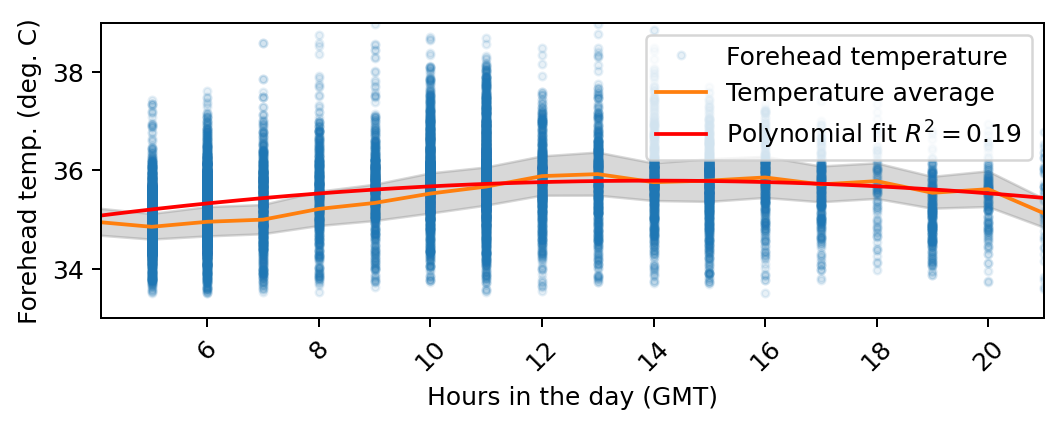

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_hours = df
df_hours['hours'] = df_hours.index.hour

#df_hours = df_hours[df_hours['machine_id'].isin([45,58,22,48,45,58,22,48,36])] #encore peut être 45,58,22,48,45,58,22,48,36

linear_regressor = make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
        )
linear_regressor.fit(df_hours['hours'].values.reshape(-1, 1), df_hours['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_hours['hours'].min(), df_hours['hours'].max()).reshape(-1, 1)

Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_hours['hours'].values.reshape(-1, 1), df_hours['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)
ax.set_ylim(33,39)


ax.set(xlabel="Hours in the day (GMT)",
       ylabel="Forehead temp. (deg. C)")
by_hour = df_hours.groupby(df_hours.index.hour+2).mean()
by_hour_std = df_hours.groupby(df_hours.index.hour+2).std()


plt.plot(df_hours.index.hour, df_hours['obj_score'],'.', alpha=0.1, label='Forehead temperature')
plt.plot(by_hour.index, by_hour['obj_score'],'-', alpha=1.0, label='Temperature average')
plt.fill_between(by_hour.index, by_hour['obj_score'] - by_hour_std['obj_score']/2, by_hour['obj_score'] + by_hour_std['obj_score']/2,
                 color='gray', alpha=0.3)
plt.xlim(4.1,21)
plt.plot(X, Y_pred, 'red', label=r'Polynomial fit $R^2={:.2f}$'.format(score_r2))

#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
print(len(df_hours))
#plt.title("Effect of time in the day on forehead temperature")
#more_than_37 = df_outside['obj_score']

#print(len(more_than_37[more_than_37 > more_than_37.mean() + 2*more_than_37.std()]))
plt.tight_layout()

plt.savefig('timeday.png')

R2 =  0.0708351069972577
9839
296
avg 35.368287099102844 std 0.6696734380060047
Personal mean 0.49277286657889025, personal std 0.2271014067955011
Location A
len 2966 avg 35.52418193964972 std 0.7044672947365535
Personal mean 0.5776835719975081, personal std 0.20077272599243792
Location B
Personal mean 0.5905216796901147, personal std nan
len 1539 avg 35.2399874312206 std 0.590521679690121
Location C
Personal mean 0.34047486459953474, personal std 0.19288973328998196
len 2503 avg 35.304687347670615 std 0.5423958193976747
17


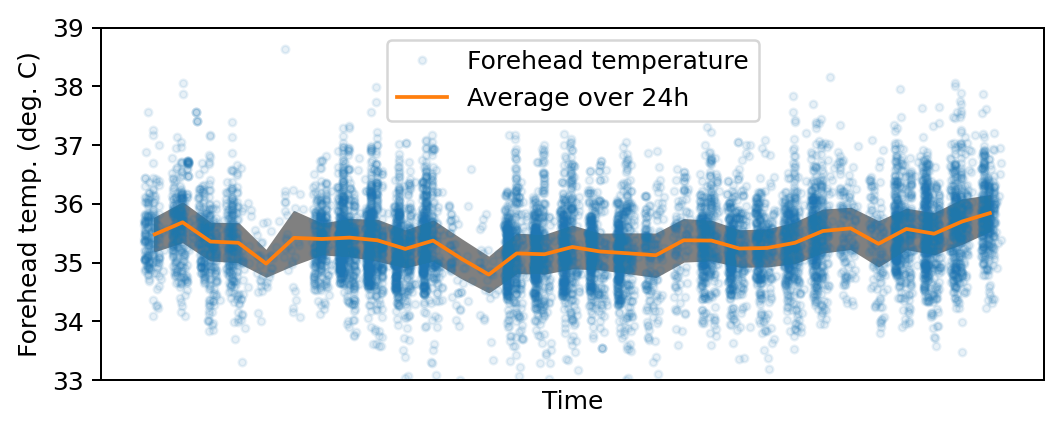

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_hours = new_df_all
df_hours['hours'] = df_hours.index.hour

#df_hours = df_hours[df_hours['machine_id'].isin([45,58,22,48,45,58,22,48,36])] #encore peut être 45,58,22,48,45,58,22,48,36

linear_regressor = make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
        )
linear_regressor.fit(df_hours['hours'].values.reshape(-1, 1), df_hours['obj_score'].values.reshape(-1, 1))
X = np.linspace(df_hours['hours'].min(), df_hours['hours'].max()).reshape(-1, 1)

Y_pred = linear_regressor.predict(X)
score_r2 = linear_regressor.score(df_hours['hours'].values.reshape(-1, 1), df_hours['obj_score'].values.reshape(-1, 1))
print('R2 = ',score_r2)
ax.set_ylim(33,39)

curve = linear_regressor.predict(df_hours['hours'].values.reshape(-1, 1))[:,0]

by_hour = df_hours.groupby(df_hours.index.hour+2).mean()
by_hour_std = df_hours.groupby(df_hours.index.hour+2).std()

df_hours['obj_score'] = df_hours['obj_score']-curve+df_hours['obj_score'].mean()

plt.plot(df_hours['timestamp'], df_hours['obj_score'],'.', alpha=0.1, label='Forehead temperature')
df_mean = df_hours.resample('D').apply({'obj_score':'mean'})
df_std = df_hours.resample('D').apply({'obj_score':'std'})

plt.plot(df_mean.index+pd.Timedelta('0.5 day'), df_mean['obj_score'], label='Average over 24h')

plt.fill_between(df_mean.index+pd.Timedelta('0.5 day'), df_mean['obj_score'] - df_std['obj_score']/2, df_mean['obj_score'] + df_std['obj_score']/2,
                 color='gray', alpha=1.0)

# Set title and labels for axes
ax.set(       ylabel="Forehead temp. (deg. C)", xlabel="Time")
frame1 = plt.gca()
frame1.axes.xaxis.set_ticks([])
#plt.plot(df_hours['amb_temp'], df_hours['obj_score']-curve+df_hours['obj_score'].mean(),'.', alpha=0.1, label='Forehead temperature')

#plt.plot(df_hours.index.hour, df_hours['obj_score'],'.', alpha=0.1, label='Forehead temperature')
#plt.plot(by_hour.index, by_hour['obj_score'],'-', alpha=1.0, label='Temperature average')
#plt.fill_between(by_hour.index, by_hour['obj_score'] - by_hour_std['obj_score']/2, by_hour['obj_score'] + by_hour_std['obj_score']/2,
#                 color='gray', alpha=0.3)
#plt.xlim(4.1,21)
#plt.plot(X, Y_pred, 'red', label=r'Polynomial fit $R^2={:.2f}$'.format(score_r2))

#df_ambient = df.resample('D').apply({'amb_temp':'mean'})
#plt.plot(df_mean.index, df_ambient['amb_temp'], label='Ambient temperature')

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)
#ax.set_legend['Forehead temperature', 'Average over a day']
ax.legend()
print(len(df_hours))
#plt.title("Correction from outside + ambient + seasonal models")
more_than_37 = df_hours['obj_score']
fig.subplots_adjust(bottom=0.2) 
ax.set_ylim(33,39)
plt.tight_layout()

print(len(more_than_37[more_than_37 > more_than_37.mean() + 2*more_than_37.std()]))
plt.savefig('corrected_outside_ambient_seasonal.png')



print("avg {} std {}".format(df_hours['obj_score'].mean(), df_hours['obj_score'].std()))

groups = df_hours.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))


print("Location A")
df_filtered = df_hours[df_hours['machine_id'].isin([36])]
print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))

print("Location B")
df_filtered = df_hours[df_hours['machine_id'].isin([24,25,30,31,32,33,34,35])]

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))

print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))
print("Location C")
df_filtered = df_hours[df_hours['machine_id'].isin([52])]

groups = df_filtered.groupby(['rfid_uid']).std()['obj_score']
print('Personal mean {}, personal std {}'.format(groups.mean(), groups.std()))
print("len {} avg {} std {}".format(len(df_filtered), df_filtered['obj_score'].mean(), df_filtered['obj_score'].std()))
more_than_37 = df_filtered ['obj_score']
print(len(more_than_37[more_than_37 > more_than_37.mean() + 3*more_than_37.std()]))





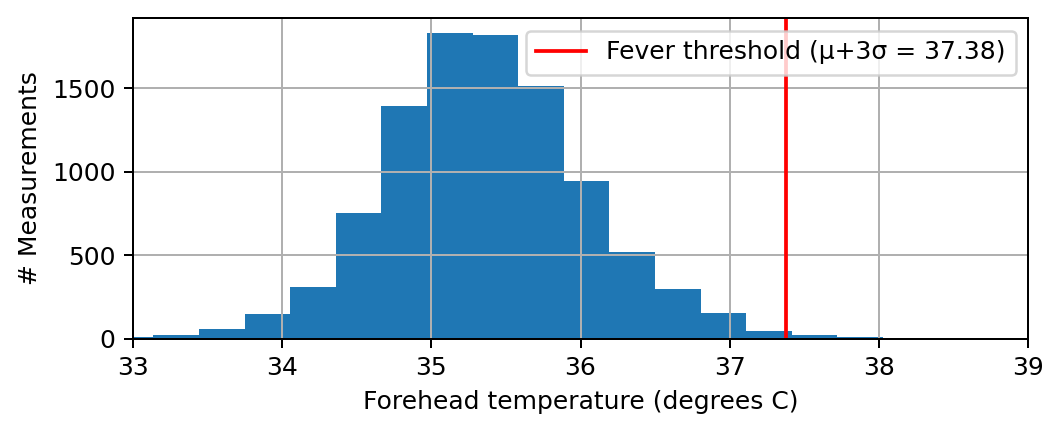

In [ ]:
plt.rcParams["figure.dpi"] = 180
fig, ax = plt.subplots(figsize=(6, 2.5), dpi=180)
df_hours.hist(column=['obj_score'], bins=20, figsize=(6, 3), ax = plt.gca())
ax.set(      ylabel="# Measurements", xlabel="Forehead temperature (degrees C)")
ax.set_title("")
ax.set_xlim(33,39)
# x coordinates for the lines
xcoords = [37.38]
# colors for the lines
colors = ['r']
for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='Fever threshold (μ+3σ = {})'.format(xc), c=c)
fig.subplots_adjust(bottom=0.2) 
plt.legend()
plt.tight_layout()

plt.savefig('hist_corr.png')
